In [44]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql

%matplotlib inline

# US 10-yr Treasury Bond
#### (i) Clean data; (ii) Calculate 'Net Non-commercial contracts'; (iii) Calculate avg, std & z-scores; (iv) Add security data to list; (v) Plot results; (vi) Plot price chart

In [45]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
CBT_data = ql.get('CFTC/043602_FO_L_ALL')
CBT_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,3855656.0,655416.0,681578.0,353988.0,2443976.0,2443882.0,3453379.0,3479448.0,402277.0,376208.0
2020-06-23,3852315.0,693177.0,676650.0,337728.0,2420355.0,2461863.0,3451260.0,3476241.0,401056.0,376075.0
2020-06-30,3916524.0,782089.0,719583.0,276324.0,2459071.0,2544077.0,3517485.0,3539984.0,399039.0,376540.0
2020-07-07,3905418.0,778202.0,698790.0,264911.0,2452199.0,2554932.0,3495312.0,3518633.0,410106.0,386785.0
2020-07-14,3890371.0,753860.0,640067.0,276533.0,2434315.0,2600404.0,3464709.0,3517004.0,425662.0,373367.0


In [46]:
#Clean Data
CBT_data = CBT_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
CBT_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,15529.0,15531.0
1995-03-28,12975.0,16214.0
1995-04-04,14348.0,13613.0
1995-04-11,15381.0,17282.0
1995-04-18,22372.0,22274.0


In [47]:
#Calculate Net Data
CBT_data["Net Noncommercial Futures/Options"] = CBT_data["Noncommercial Long"] - CBT_data["Noncommercial Short"]
CBT_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,655416.0,681578.0,-26162.0
2020-06-23,693177.0,676650.0,16527.0
2020-06-30,782089.0,719583.0,62506.0
2020-07-07,778202.0,698790.0,79412.0
2020-07-14,753860.0,640067.0,113793.0


In [48]:
#Calculate mean and std
Average_cbt = CBT_data["Net Noncommercial Futures/Options"].mean()
x = np.array(CBT_data["Net Noncommercial Futures/Options"])
std_cbt = x.std()

z_score_historical_cbt = ((CBT_data["Net Noncommercial Futures/Options"][-1]) - Average_cbt)/std_cbt
z_score_historical_cbt

0.7423891628778466

In [49]:
#Create list to display data

CBT_list = ["Fixed Income", "UST-10yr", CBT_data["Net Noncommercial Futures/Options"][-1], Average_cbt, std_cbt, z_score_historical_cbt]
print(CBT_list)

['Fixed Income', 'UST-10yr', 113793.0, -6603.224659606656, 162174.0061410578, 0.7423891628778466]


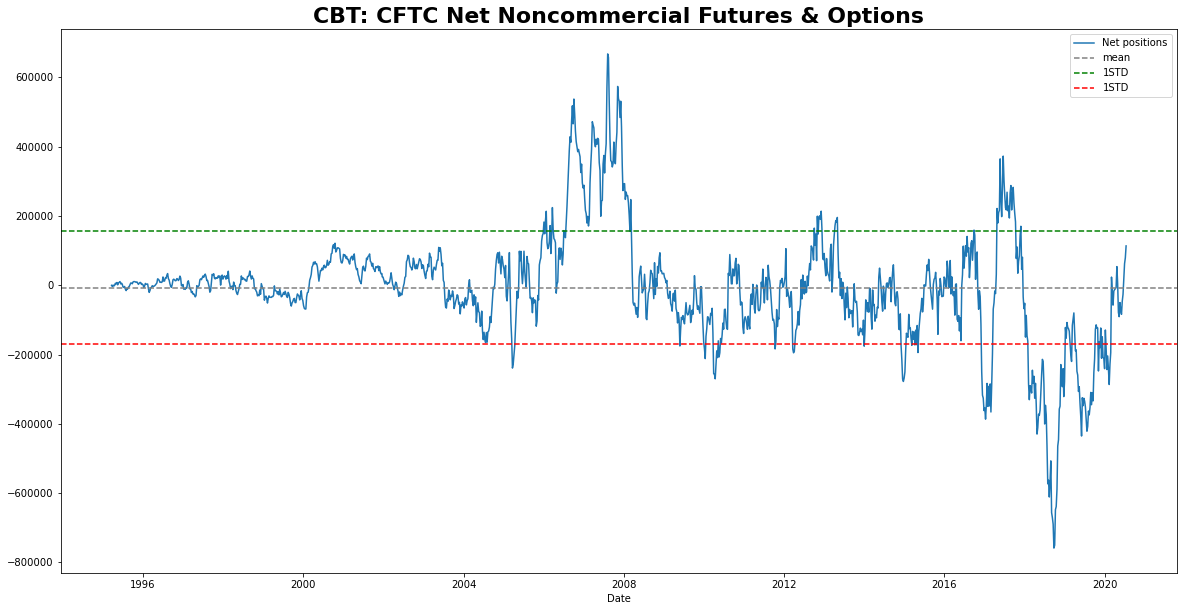

In [50]:
#Plot CBT CFTC data
def create_plot(data):
    x = CBT_data.index
    y = CBT_data["Net Noncommercial Futures/Options"]
    std_positive = (Average_cbt + std_cbt)
    std_negative = (Average_cbt - std_cbt)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_cbt,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"CBT: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(CBT_data["Net Noncommercial Futures/Options"])

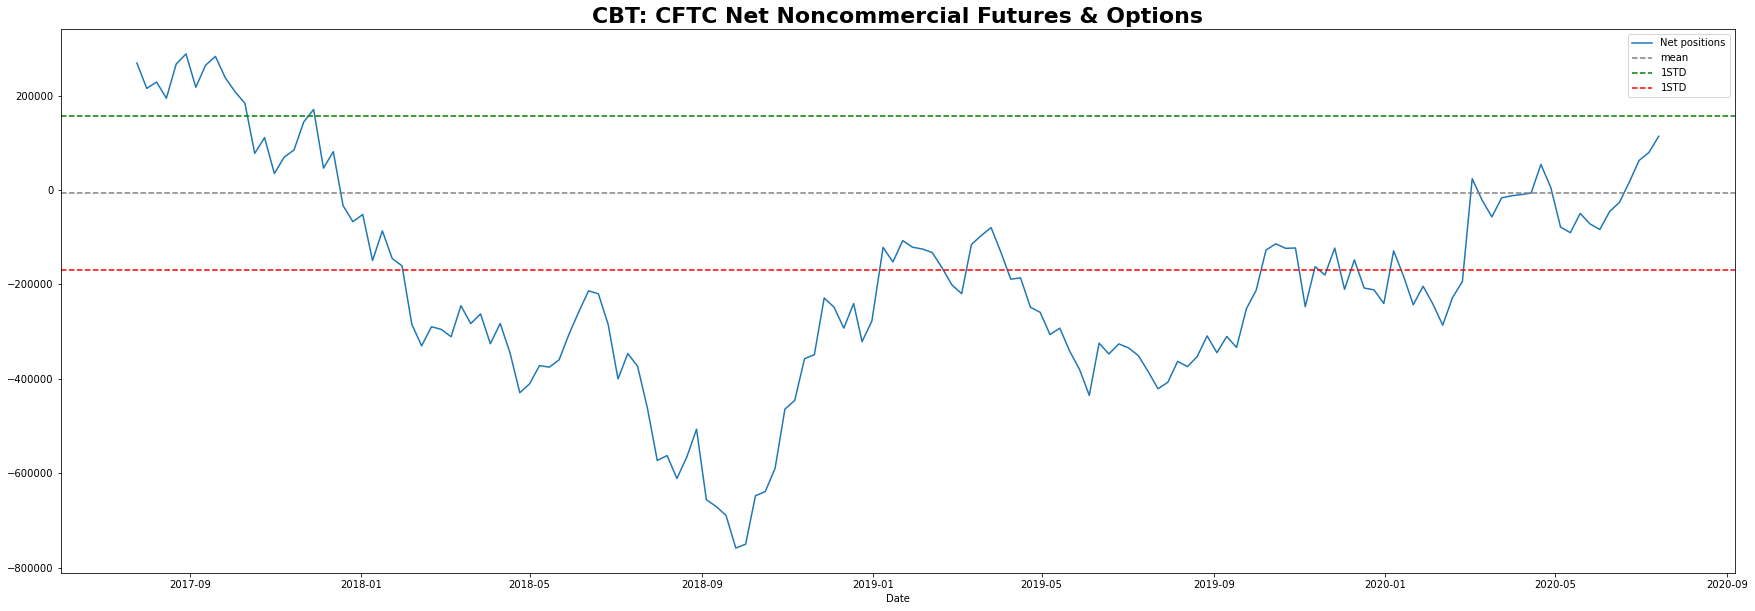

In [51]:
##Plot CBT CFTC data last 3 years
def create_plot(data):
    x = CBT_data.index[-156:]
    y = CBT_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average_cbt + std_cbt)
    std_negative = (Average_cbt - std_cbt)

    plt.subplots(figsize=(30,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_cbt,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"CBT: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(CBT_data["Net Noncommercial Futures/Options"][-156:])

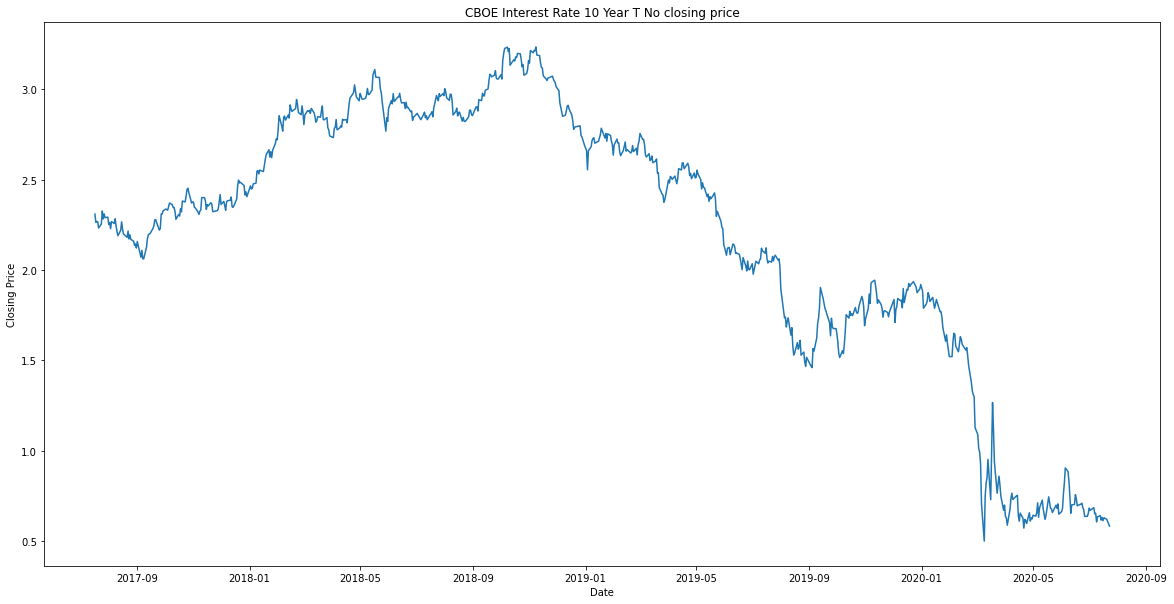

In [33]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('^TNX')

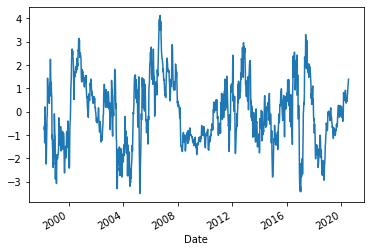

In [52]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z
#z_score_historical_cbt = ((CBT_data["Net Noncommercial Futures/Options"][-1]) - Average_cbt)/std_cbt
#z_score_historical_cbt

CBT_data['Z_score_1yr'] = zscore(CBT_data.loc[:,'Net Noncommercial Futures/Options'], 52*3)
CBT_data['Z_score_1yr'].plot()


In [ ]:
# Get returns 